In [0]:
!git clone -b dev https://github.com/nyikovicsmate/thesis

Cloning into 'thesis'...
remote: Enumerating objects: 278, done.
remote: Counting objects: 100% (278/278), done.
remote: Compressing objects: 100% (158/158), done.
remote: Total 1697 (delta 167), reused 216 (delta 119), pack-reused 1419
Receiving objects: 100% (1697/1697), 199.11 MiB | 38.48 MiB/s, done.
Resolving deltas: 100% (656/656), done.


In [0]:
%cd thesis

/content/thesis


In [0]:
!pip3 install -q gdown
# bsd500_gray.zip
# !gdown https://drive.google.com/uc?id=1O2tduoLX1DdP3VoLkAQfuv5ssFxf8LPc
# !unzip -q bsd500_gray.zip
# bsd500_color.zip
!gdown https://drive.google.com/uc?id=1buG1ziqMjy18gnpkuQjqk81XrLsGjT7p
!unzip -q bsd500_color.zip
# set14_color.zip
!gdown https://drive.google.com/uc?id=1OiDs7jRm3NZCY6ghjyE12G5hVS0fG4EM
!unzip -q set14_color.zip

Downloading...
From: https://drive.google.com/uc?id=1buG1ziqMjy18gnpkuQjqk81XrLsGjT7p
To: /content/thesis/bsd500_color.zip
29.4MB [00:00, 91.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1OiDs7jRm3NZCY6ghjyE12G5hVS0fG4EM
To: /content/thesis/set14_color.zip
100% 831k/831k [00:00<00:00, 54.9MB/s]


In [0]:
%tensorflow_version 2.x
from src.callbacks import *
from src.dataset import *
import numpy as np
import tensorflow as tf

from src.networks.adversarial.post_upsampling_network import AdversarialPostUpsamplingNetwork

In [0]:
seed = 1111

normalize = lambda x: np.asarray(x / 255.0, dtype=np.float32)
downsample = lambda x: np.array([cv2.resize(x_i, (x.shape[2]//2, x.shape[1]//2), interpolation=cv2.INTER_CUBIC) for x_i in x])

ds = HDFDataset("bsd500_70_70_color.h5").shuffle(seed).transform()
ds_g_hr = ds.batch(20).map(normalize)
ds_g_lr = ds.batch(20).map(downsample).map(normalize)
ds_d_hr = ds.batch(20).map(normalize)
ds_d_lr = ds.batch(20).map(downsample).map(normalize)

# cb_g = [TrainingCheckpointCallback(appendix="_ad_iter", save_freq=10),
#        ExponentialDecayCallback(learning_rate, epochs, decay_rate=0.9)]
# cb_d = [TrainingCheckpointCallback(appendix="_ad_iter", save_freq=10),
#        ExponentialDecayCallback(learning_rate, epochs, decay_rate=0.9)]

In [0]:
network = AdversarialPostUpsamplingNetwork((None, None, 3))
network.train(ds_g_lr, ds_g_hr,
              ds_d_lr, ds_d_hr,
              generator_epochs=2000,
              discriminator_epochs=2000,
              alternating_ratio=20,
              generator_lr=1e-4,
              discriminator_lr=1e-6,
              generator_callbacks=[],
              discriminator_callbacks=[])

[2020-05-21 10:03:38,777] INFO load_state(): Loaded state with: 
Train time: 00h:25m:53s
Epochs:     4980
Loss:       20389.0723
[2020-05-21 10:03:38,801] INFO load_state(): Loaded state with: 
Train time: 00h:03m:53s
Epochs:     148
Loss:       0.4277
[2020-05-21 10:03:38,802] INFO train(): Training discriminator network.
[2020-05-21 10:03:40,298] INFO _train(): Epoch: 0 train_loss: 1.51
[2020-05-21 10:03:40,999] INFO _train(): Epoch: 1 train_loss: 2.64
[2020-05-21 10:03:41,713] INFO _train(): Epoch: 2 train_loss: 1.33
[2020-05-21 10:03:42,439] INFO _train(): Epoch: 3 train_loss: 3.16
[2020-05-21 10:03:43,142] INFO _train(): Epoch: 4 train_loss: 3.59
[2020-05-21 10:03:43,861] INFO _train(): Epoch: 5 train_loss: 4.26
[2020-05-21 10:03:44,606] INFO _train(): Epoch: 6 train_loss: 2.82
[2020-05-21 10:03:45,337] INFO _train(): Epoch: 7 train_loss: 0.76
[2020-05-21 10:03:46,045] INFO _train(): Epoch: 8 train_loss: 2.93
[2020-05-21 10:03:46,747] INFO _train(): Epoch: 9 train_loss: 1.60
[2020

[2020-05-21 09:57:23,248] WARNING save_state(): Model directory /content/thesis/checkpoints/postupsamplingnetwork_ad_post does not exist. Creating it.
[2020-05-21 09:57:23,280] INFO save_state(): Saved state.
[2020-05-21 09:57:23,282] WARNING save_state(): Model directory /content/thesis/checkpoints/discriminatornetwork_ad_post does not exist. Creating it.
[2020-05-21 09:57:23,314] INFO save_state(): Saved state.
[2020-05-21 09:57:23,333] INFO load_state(): Loaded state with: 
Train time: 00h:42m:30s
Epochs:     6780
Loss:       6045.7837
[2020-05-21 09:57:23,355] INFO load_state(): Loaded state with: 
Train time: 00h:16m:07s
Epochs:     1348
Loss:       10.0916
[2020-05-21 09:57:23,531] INFO _predict(): Predicted images with shape: (14, 70, 70, 3)
   HR   ALIASED   NETWORK   


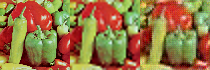

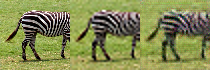

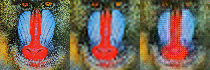

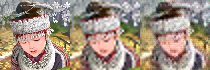

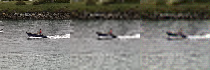

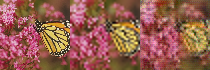

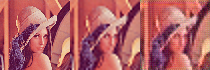

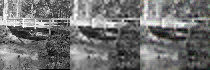

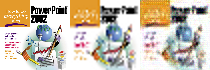

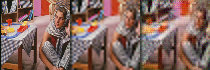

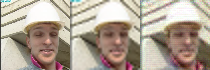

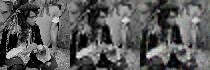

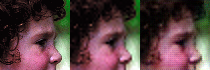

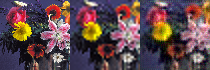

SSIM
max: [10] 0.77    min: [2] 0.46    avg: 0.60
TOTAL_VARIATION
max: [8] 2356.32    min: [4] 1051.67    avg: 1794.17
PSNR
max: [12] 25.32    min: [8] 15.12    avg: 19.40
MEAN_SQUARED_ERROR
max: [8] 150.58    min: [12] 14.40    avg: 65.63
MEAN_ABSOLUTE_ERROR
max: [8] 556.08    min: [12] 189.12    avg: 391.33


In [0]:
from google.colab.patches import cv2_imshow

ds_ev_lr = DirectoryDataset("set14_70_70_color").map(downsample).map(normalize)
ds_ev_hr = DirectoryDataset("set14_70_70_color").map(normalize)

network.save_state(generator_appendix="_ad_post", discriminator_appendix="_ad_post")
# load best network state
network.load_state(generator_appendix="_ad_post", discriminator_appendix="_ad_post")

with ds_ev_lr as x, ds_ev_hr as y:
    x_batch = next(iter(x))
    y_batch = next(iter(y))
    # predict
    y_pred = network.predict(x_batch)
    print("   HR   ALIASED   NETWORK   ")
    for image_idx in range(len(x_batch)):
        aliased = tf.image.resize(x_batch[image_idx], size=tuple(y_batch[image_idx].shape[:2]), method="bicubic", antialias=True)
        img_0 = np.concatenate((y_batch[image_idx], aliased, y_pred[image_idx]), axis=1)
        cv2_imshow(img_0*255)
    # evaluate
    results = network.evaluate(y_batch, y_pred)

In [0]:
%cd checkpoints/
!zip -r post_adversarial.zip ./discriminatornetwork_ad_post ./postupsamplingnetwork_ad_post
%cd ..

In [0]:
from google.colab.files import download

download("./checkpoints/post_adversarial.zip")